# Analysis using VAE
### Author: Marlene Marchena

### Importing Libraries

In [1]:
#Import data manipulation libraries
import VAE
import pandas as pd
import numpy as np
import time
import multiprocessing as mp

#Import visualization libraries
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# over sampling functions
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

# metrics
from sklearn.metrics import f1_score, recall_score, precision_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

#set random seed and percentage of test data
random_seed = 12345678
np.random.seed(12345678)
tf.random.set_seed(12345678)

Loading the train and test data for the five folds

In [3]:
x_train1 = np.loadtxt('x_train1_outlierTreatment.csv', delimiter=',')
y_train1 = np.loadtxt('y_train1_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train1 = y_train1.reshape(-1,1)
x_test1 = np.loadtxt('x_test_fold1.csv', delimiter=',')
y_test1 = np.loadtxt('y_test_fold1.csv', dtype='int32', delimiter=',')
y_test1 = y_test1.reshape(-1,1)

x_train2 = np.loadtxt('x_train2_outlierTreatment.csv', delimiter=',')
y_train2 = np.loadtxt('y_train2_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train2 = y_train2.reshape(-1,1)
x_test2 = np.loadtxt('x_test_fold2.csv', delimiter=',')
y_test2 = np.loadtxt('y_test_fold2.csv', dtype='int32', delimiter=',') 
y_test2 = y_test2.reshape(-1,1)

x_train3 = np.loadtxt('x_train3_outlierTreatment.csv', delimiter=',')
y_train3 = np.loadtxt('y_train3_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train3 = y_train3.reshape(-1,1)
x_test3 = np.loadtxt('x_test_fold3.csv', delimiter=',')
y_test3 = np.loadtxt('y_test_fold3.csv', dtype='int32', delimiter=',') 
y_test3 = y_test3.reshape(-1,1)

x_train4 = np.loadtxt('x_train4_outlierTreatment.csv', delimiter=',')
y_train4 = np.loadtxt('y_train4_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train4 = y_train4.reshape(-1,1)
x_test4 = np.loadtxt('x_test_fold4.csv', delimiter=',')
y_test4 = np.loadtxt('y_test_fold4.csv', dtype='int32', delimiter=',') 
y_test4 = y_test4.reshape(-1,1)

x_train5 = np.loadtxt('x_train5_outlierTreatment.csv', delimiter=',')
y_train5 = np.loadtxt('y_train5_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train5 = y_train5.reshape(-1,1)
x_test5 = np.loadtxt('x_test_fold5.csv', delimiter=',')
y_test5 = np.loadtxt('y_test_fold5.csv', dtype='int32', delimiter=',') 
y_test5 = y_test5.reshape(-1,1)

We are going to scale all the dataset between 0 and 1, this is done to facilitate the training process 

In [7]:
## define min max scaler
scaler = MinMaxScaler()

# scaling the data
x_train_f1_scaled = scaler.fit_transform(x_train1)  
x_train_f2_scaled = scaler.fit_transform(x_train2)  
x_train_f3_scaled = scaler.fit_transform(x_train3)  
x_train_f4_scaled = scaler.fit_transform(x_train4)  
x_train_f5_scaled = scaler.fit_transform(x_train5)  

x_test_f1_scaled = scaler.fit_transform(x_test1)  
x_test_f2_scaled = scaler.fit_transform(x_test2)  
x_test_f3_scaled = scaler.fit_transform(x_test3)  
x_test_f4_scaled = scaler.fit_transform(x_test4)  
x_test_f5_scaled = scaler.fit_transform(x_test5) 

## Variational Autoencoders (VAE)

In [8]:
def train_vae(x_train,y_train,x_test,y_test,epochs = 100, batch_size=64, name='name'):
    '''
    This functions train VAE and save the h5 file and the 
    training losses image  
    '''   
    vae = VAE.VAE()
    # spliting train and test into normal and fraud samples
    y_train_0, y_train_1 = y_train[y_train==0], y_train[y_train==1]
    x_train_0, x_train_1 = x_train[y_train_0], x_train[y_train_1]
    
    y_test_0, y_test_1 = y_test[y_test==0], y_test[y_test==1]
    x_test_0, x_test_1 = x_test[y_test_0], x_test[y_test_1]
    # training VAE using only frauds samples
    vae_model = vae.build_vae()
    history = vae_model.fit(x_train_1, epochs=epochs,batch_size=batch_size,
                            validation_data=(x_test_1, None))
    # save the generator model
    vae_model.save(f'{name}.h5')    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(f'{name}.png')
    plt.show()

Epoch 1/3000
6/6 [==============================] - 0s 26ms/step - loss: 2.6250 - val_loss: 0.0328
Epoch 2/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1771 - val_loss: 0.0402
Epoch 3/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.1593 - val_loss: 0.1173
Epoch 4/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0872 - val_loss: 0.0319
Epoch 5/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.0790 - val_loss: 0.0421
Epoch 6/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0098 - val_loss: 0.0698
Epoch 7/3000
6/6 [==============================] - 0s 6ms/step - loss: 0.0423 - val_loss: -0.0197
Epoch 8/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.0316
Epoch 9/3000
6/6 [==============================] - 0s 5ms/step - loss: 0.0034 - val_loss: 0.0243
Epoch 10/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.0039
Epoch 11/3000
6/6

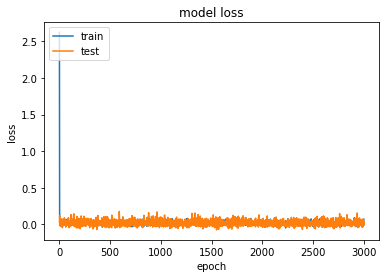

In [15]:
##training de VAE for each fold
#train_vae(x_train_f1_scaled,y_train1,x_test_f1_scaled,y_test1, 3000, 64,'vae_fold1')
#train_vae(x_train_f2_scaled,y_train2,x_test_f2_scaled,y_test2, 3000, 64,'vae_fold2')
#train_vae(x_train_f3_scaled,y_train3,x_test_f3_scaled,y_test3, 3000, 64,'vae_fold3')
#train_vae(x_train_f4_scaled,y_train4,x_test_f4_scaled,y_test4, 3000, 64,'vae_fold4')
train_vae(x_train_f5_scaled,y_train5,x_test_f5_scaled,y_test5, 3000, 64,'vae_fold5')  

In [16]:
def generate_balance_data_vae(x_train, y_train, x_test, y_test, h5file='vae.h5'):
    '''
    This function uses the VAE saved model in order to generate fraud samples.
    These samples are added to the training dataset to balance the data

    Returns a balanced dataset
    '''
    vae = VAE.VAE()
        
    # spliting train and test into normal and fraud samples
    y_train_0, y_train_1 = y_train[y_train==0], y_train[y_train==1]
    x_train_0, x_train_1 = x_train[y_train_0], x_train[y_train_1]
    
    # calculate the samples needed in order to balance the training set
    n_samples = y_train_0.shape[0] - y_train_1.shape[0] 

    # Use the gan saved model in order to generate samples
    x_vae_gen = vae.generate_data(n_samples, name=h5file)     
    # Labels generation
    y_gen = np.ones((n_samples,1), dtype='int32')

    # Add the generated samples to the training GAN
    x_vae = np.vstack((x_train,x_vae_gen))
    y_vae = np.vstack((y_train,y_gen))
    
    return x_vae, y_vae

For each fold we balance the data using VAE

In [17]:
x_vae_f1, y_vae_f1 = generate_balance_data_vae(x_train_f1_scaled,y_train1,x_test_f1_scaled,y_test1,h5file='vae_fold1.h5')
x_vae_f2, y_vae_f2 = generate_balance_data_vae(x_train_f2_scaled,y_train2,x_test_f2_scaled,y_test2,h5file='vae_fold2.h5')
x_vae_f3, y_vae_f3 = generate_balance_data_vae(x_train_f3_scaled,y_train3,x_test_f3_scaled,y_test3,h5file='vae_fold3.h5')
x_vae_f4, y_vae_f4 = generate_balance_data_vae(x_train_f4_scaled,y_train4,x_test_f4_scaled,y_test4,h5file='vae_fold4.h5')
x_vae_f5, y_vae_f5 = generate_balance_data_vae(x_train_f5_scaled,y_train5,x_test_f5_scaled,y_test5,h5file='vae_fold5.h5')

In [18]:
# creating an external MinMaxScaler object for each fold to do the inverse transformation of the data to recover original values
obj1 = scaler.fit(x_train1)
x_vae_f1 = obj1.inverse_transform(x_vae_f1)

obj2 = scaler.fit(x_train2)
x_vae_f2 = obj2.inverse_transform(x_vae_f2)

obj3 = scaler.fit(x_train3)
x_vae_f3 = obj3.inverse_transform(x_vae_f3)

obj4 = scaler.fit(x_train4)
x_vae_f4 = obj4.inverse_transform(x_vae_f4)

obj5 = scaler.fit(x_train5)
x_vae_f5 = obj5.inverse_transform(x_vae_f5)

In [19]:
def Evaluate_Top100(model,x_train,y_train,x_test,y_test):
    '''
    This fuction fits a model with the original data and evaluate it with the top 100 alerts
    model to be used
    Returns the confusion matrix and performance measures over the top 100 alerts
    '''   
    clf = model.fit(x_train,np.ravel(y_train))

    # Prediction on the test dataset
    predicted = clf.predict(x_test)
    pred_prob = clf.predict_proba(x_test) 
    #selecting only probabilities of frauds
    pred_prob1 = pred_prob[:,1]
    
    #Sorting in descending order by the probability of class 1  
    pred_prob_sorted_idx = np.argsort(-pred_prob1)
    pred_prob_sorted_idx = pred_prob_sorted_idx[:100]
        
    y_pred_top100 =predicted[pred_prob_sorted_idx]
    y_test_top100 = y_test[pred_prob_sorted_idx]
  
    f  = round(f1_score(y_test_top100,y_pred_top100),6)  # f1: 2 tp / (2 tp + fp + fn)
    recall  = round(recall_score(y_test_top100,y_pred_top100),6) # recall: tp / (tp + fn)
    pre  = round(precision_score(y_test_top100,y_pred_top100),6) # precision: tp / (tp + fp)
    p, r, _ = precision_recall_curve(y_test_top100,y_pred_top100)

    auprc = round(auc(r, p),6) if not np.isnan(auc(r, p)) else None


    tn, fp, fn, tp = confusion_matrix(y_test_top100,y_pred_top100).ravel()

    results = {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,'precision': pre, 'recall': recall, 
               'f1_score': f, 'auprc': auprc }

    return results

In [20]:
#Using multiprocessing to speed the running time
if __name__ == '__main__':
    
    start = time.time()
    
    # Setting the models to be used
#     knn = KNeighborsClassifier(n_neighbors=3)
#     rf = RandomForestClassifier(max_depth=3, random_state=random_seed)
    xgb = XGBClassifier(random_state=random_seed)   
    
    values = ((xgb , x_vae_f1, y_vae_f1, x_test1, y_test1), 
              (xgb , x_vae_f2, y_vae_f2, x_test2, y_test2), 
              (xgb , x_vae_f3, y_vae_f3, x_test3, y_test3),   
              (xgb , x_vae_f4, y_vae_f4, x_test4, y_test4),   
              (xgb , x_vae_f5, y_vae_f5, x_test5, y_test5)   
             )   
    pool = mp.Pool()
    p = pool.starmap(Evaluate_Top100, values)
    print(p) 
    df = pd.DataFrame(p, index =['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'])
    print(df)
    xgb_df_mean = df.iloc[:,4:].mean()
    print(xgb_df_mean)
    end = time.time()
    total = round(end - start,1)
    print('Time taken = {} minutes'.format(total/60))

[{'tn': 10, 'fp': 4, 'fn': 9, 'tp': 77, 'precision': 0.950617, 'recall': 0.895349, 'f1_score': 0.922156, 'auprc': 0.967983}, {'tn': 16, 'fp': 5, 'fn': 5, 'tp': 74, 'precision': 0.936709, 'recall': 0.936709, 'f1_score': 0.936709, 'auprc': 0.961709}, {'tn': 21, 'fp': 4, 'fn': 3, 'tp': 72, 'precision': 0.947368, 'recall': 0.96, 'f1_score': 0.953642, 'auprc': 0.968684}, {'tn': 17, 'fp': 5, 'fn': 7, 'tp': 71, 'precision': 0.934211, 'recall': 0.910256, 'f1_score': 0.922078, 'auprc': 0.957233}, {'tn': 17, 'fp': 4, 'fn': 4, 'tp': 75, 'precision': 0.949367, 'recall': 0.949367, 'f1_score': 0.949367, 'auprc': 0.969367}]
        tn  fp  fn  tp  precision    recall  f1_score     auprc
fold 1  10   4   9  77   0.950617  0.895349  0.922156  0.967983
fold 2  16   5   5  74   0.936709  0.936709  0.936709  0.961709
fold 3  21   4   3  72   0.947368  0.960000  0.953642  0.968684
fold 4  17   5   7  71   0.934211  0.910256  0.922078  0.957233
fold 5  17   4   4  75   0.949367  0.949367  0.949367  0.969367